In [2]:
import pandas as pd
import xlrd

import numpy as np
import math

import matplotlib.pyplot as plt
import os

In [3]:
wines_data = pd.read_csv('winequality/winequality-red.csv', sep=';')

In [4]:
print("Red wines data: ")
print(wines_data.head())

Red wines data: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

In [5]:
full_set = wines_data.values

In [28]:
from sklearn.svm import LinearSVR, SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
X = full_set[:,:-1]
y = full_set[:,-1]
classes = np.unique(full_set[:,-1])

In [68]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

In [76]:
# number of samples of the selected class in train and test set
sample_count = np.zeros((3,np.size(classes)))
sample_count[0,:] = classes
for cls in  classes:
    sample_count[1,classes == cls] = np.sum(y_train==cls)
    sample_count[2,classes == cls] = np.sum(y_test==cls)

print("Rozmiar zbioru treningowego: "+ str(np.size(y_train)))
print("\nRozmiar zbioru testowego: "+ str(np.size(y_test)))
print("\nIlość próbek poszczególnych klas w zbiorach treningowym i testowym:" )
print(sample_count)


Rozmiar zbioru treningowego: 1199

Rozmiar zbioru testowego: 400

Ilość próbek poszczególnych klas w zbiorach treningowym i testowym:
[[  3.   4.   5.   6.   7.   8.]
 [  8.  39. 512. 468. 159.  13.]
 [  2.  14. 169. 170.  40.   5.]]


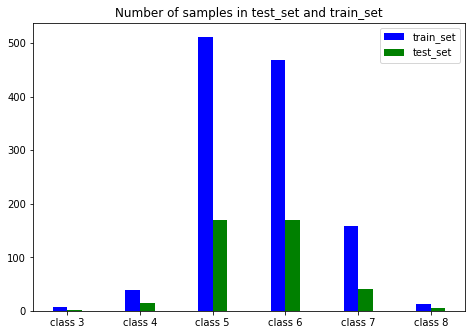

In [171]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


x_axis = classes
plt.xticks(classes, ['class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8'])
ax.bar(x_axis - 0.1, sample_count[1,:], color = 'b', width = 0.2)
ax.bar(x_axis + 0.1, sample_count[2,:], color = 'g', width = 0.2)
ax.legend(['train_set', 'test_set'])
plt.title('Number of samples in test_set and train_set', fontdict=None, loc='center')
plt.show()

In [81]:
5/(18)

0.2777777777777778

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
regr_LinearSVR = LinearSVR(random_state=0, tol=1e-5, max_iter = 100000, epsilon = 0.01)
regr_LinearSVR.fit(X_train,y_train)
y_predicted_LinearSVR_test = regr_LinearSVR.predict(X_test)
y_predicted_LinearSVR_train = regr_LinearSVR.predict(X_train)

In [137]:
regr_RBFSVR = SVR(kernel = 'rbf')
regr_RBFSVR.fit(X_train,y_train)
y_predicted_RBFSVR_test = regr_RBFSVR.predict(X_test)
y_predicted_RBFSVR_train = regr_RBFSVR.predict(X_train)

In [138]:
LinearSVR_mean_error_test = np.mean(np.absolute(y_test-y_predicted_LinearSVR_test))
RBFSVR_mean_error_test = np.mean(np.absolute(y_test-y_predicted_RBFSVR_test))
LinearSVR_mean_error_train = np.mean(np.absolute(y_train-y_predicted_LinearSVR_train))
RBFSVR_mean_error_train = np.mean(np.absolute(y_train-y_predicted_RBFSVR_train))

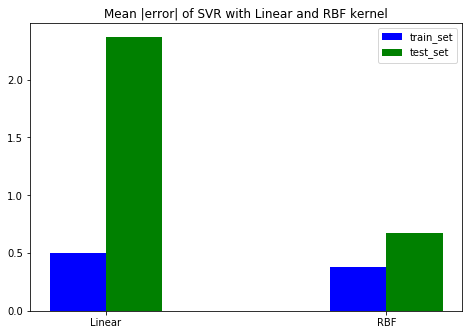

In [169]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kernels = ['Linear','RBF']
mean_errors = [[LinearSVR_mean_error_train, RBFSVR_mean_error_train],[LinearSVR_mean_error_test, RBFSVR_mean_error_test]]
x_axis = np.arange(2)
plt.xticks([0, 1], ['Linear', 'RBF'])
ax.bar(x_axis - 0.1, mean_errors[0], color = 'b', width = 0.2)
ax.bar(x_axis + 0.1, mean_errors[1], color = 'g', width = 0.2)
ax.legend(['train_set', 'test_set'])
plt.title('Mean |error| of SVR with Linear and RBF kernel', fontdict=None, loc='center')
plt.show()

In [143]:


LinearSVR_classes_mean_error = np.zeros((3,np.size(classes)))
LinearSVR_classes_mean_error[0,:] = classes

RBFSVR_classes_mean_error = np.zeros((3,np.size(classes)))
RBFSVR_classes_mean_error[0,:] = classes
for cls in  classes:
    LinearSVR_classes_mean_error[1,classes == cls] = np.mean(np.absolute(y_train[y_train==cls]-y_predicted_LinearSVR_train[y_train==cls]))
    LinearSVR_classes_mean_error[2,classes == cls] = np.mean(np.absolute(y_test[y_test==cls]-y_predicted_LinearSVR_test[y_test==cls]))

    RBFSVR_classes_mean_error[1,classes == cls] = np.mean(np.absolute(y_train[y_train==cls]-y_predicted_RBFSVR_train[y_train==cls]))
    RBFSVR_classes_mean_error[2,classes == cls] = np.mean(np.absolute(y_test[y_test==cls]-y_predicted_RBFSVR_test[y_test==cls]))

print(LinearSVR_classes_mean_error)
print(RBFSVR_classes_mean_error)
    

[[3.         4.         5.         6.         7.         8.        ]
 [2.09778022 1.36022887 0.35048423 0.44880685 0.75104156 1.51699425]
 [4.79161783 3.91076439 2.63375532 2.09279938 1.82495541 2.13018019]]
[[3.         4.         5.         6.         7.         8.        ]
 [1.79714284 1.1242867  0.26026888 0.33753704 0.54365104 1.49496648]
 [2.45479022 1.45478999 0.45479022 0.54520979 1.54520979 2.54520978]]


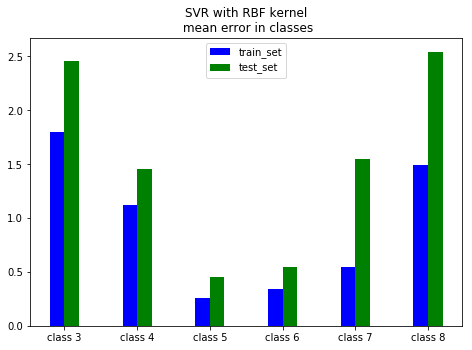

In [144]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kernels = ['Linear','RBF']
mean_errors = [[LinearSVR_mean_error_train, RBFSVR_mean_error_train],[LinearSVR_mean_error_test, RBFSVR_mean_error_test]]
x_axis = classes
plt.xticks(classes, ['class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8'])
ax.bar(x_axis - 0.1, RBFSVR_classes_mean_error[1,:], color = 'b', width = 0.2)
ax.bar(x_axis + 0.1, RBFSVR_classes_mean_error[2,:], color = 'g', width = 0.2)
ax.legend(['train_set', 'test_set'])
plt.title('SVR with RBF kernel\n mean error in classes', fontdict=None, loc='center')
plt.show()

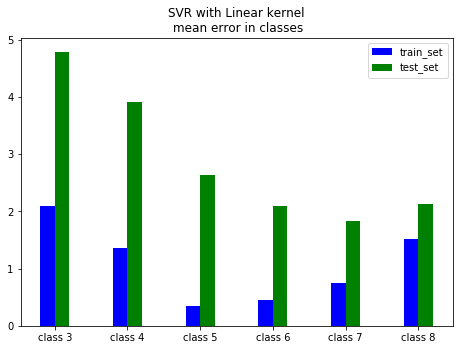

In [145]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kernels = ['Linear','RBF']
mean_errors = [[LinearSVR_mean_error_train, RBFSVR_mean_error_train],[LinearSVR_mean_error_test, RBFSVR_mean_error_test]]
x_axis = classes
plt.xticks(classes, ['class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8'])
ax.bar(x_axis - 0.1, LinearSVR_classes_mean_error[1,:], color = 'b', width = 0.2)
ax.bar(x_axis + 0.1, LinearSVR_classes_mean_error[2,:], color = 'g', width = 0.2)
ax.legend(['train_set', 'test_set'])
plt.title('SVR with Linear kernel\n mean error in classes', fontdict=None, loc='center')
plt.show()

In [163]:
level = 1

LinearSVR_classes_perct_error = np.zeros((3,np.size(classes)))
LinearSVR_classes_perct_error[0,:] = classes

RBFSVR_classes_perct_error = np.zeros((3,np.size(classes)))
RBFSVR_classes_perct_error[0,:] = classes
for cls in  classes:
    LinearSVR_classes_perct_error[1,classes == cls] = np.sum(np.absolute(y_train[y_train==cls]-y_predicted_LinearSVR_train[y_train==cls])<level)
    LinearSVR_classes_perct_error[2,classes == cls] = np.sum(np.absolute(y_test[y_test==cls]-y_predicted_LinearSVR_test[y_test==cls])<level)

    RBFSVR_classes_perct_error[1,classes == cls] = np.sum(np.absolute(y_train[y_train==cls]-y_predicted_RBFSVR_train[y_train==cls])<level)
    RBFSVR_classes_perct_error[2,classes == cls] = np.sum(np.absolute(y_test[y_test==cls]-y_predicted_RBFSVR_test[y_test==cls])<level)

LinearSVR_classes_perct_error[1] = LinearSVR_classes_perct_error[1]/sample_count[1]
LinearSVR_classes_perct_error[2] = LinearSVR_classes_perct_error[2]/sample_count[2]

RBFSVR_classes_perct_error[1] = RBFSVR_classes_perct_error[1]/sample_count[1]
RBFSVR_classes_perct_error[2] = RBFSVR_classes_perct_error[2]/sample_count[2]

print(LinearSVR_classes_perct_error)
print("\n")
print(RBFSVR_classes_perct_error)

[[3.         4.         5.         6.         7.         8.        ]
 [0.         0.23076923 0.94335938 0.94017094 0.77358491 0.        ]
 [0.         0.07142857 0.14792899 0.25294118 0.275      0.4       ]]


[[3.         4.         5.         6.         7.         8.        ]
 [0.         0.38461538 0.96875    0.98290598 0.8427673  0.        ]
 [0.         0.         1.         1.         0.         0.        ]]


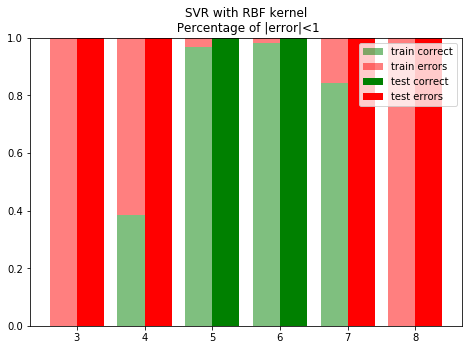

In [166]:
N = 5
trainPositive = RBFSVR_classes_perct_error[1]
trainNegative = 1-RBFSVR_classes_perct_error[1]
testPositive = RBFSVR_classes_perct_error[2]
testNegative = 1-RBFSVR_classes_perct_error[2]
ind = classes # the x locations for the groups
width = 0.4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind-0.2, trainPositive, width, color='g', alpha = 0.5)
ax.bar(ind-0.2, trainNegative, width,bottom=trainPositive, color='r',alpha = 0.5)
ax.bar(ind+0.2, testPositive, width, color='g')
ax.bar(ind+0.2, testNegative, width,bottom=testPositive, color='r',)
#ax.set_ylabel('Scores')
ax.set_title('SVR with RBF kernel\n Percentage of |error|<1')
#ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['train correct', 'train errors', 'test correct', 'test errors'])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [16]:
print(scaler.transform(X))

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [17]:
X = scaler.transform(X)

In [18]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [19]:
regr.fit(X,y)
y_predicted = regr.predict(X)

In [20]:
y_predicted

array([4.96644887, 5.11479279, 5.16734779, ..., 5.85724202, 5.41920549,
       5.90767402])

In [26]:
SVR_mean = np.mean(np.absolute(y-y_predicted))
print(SVR_mean)

0.4937525220805761


In [58]:
regr_RBF = SVR(kernel = 'sigmoid')

In [59]:
regr_RBF.fit(X,y)
y_predicted_RBF = regr_RBF.predict(X)

In [60]:
SVR_mean = np.mean(np.absolute(y-y_predicted_RBF))
print(SVR_mean)

9.088440910460728


In [61]:
y_predicted_RBF

array([12.09249424,  1.32228223,  4.26689761, ...,  3.61731378,
       -1.99785278,  7.99533124])

ValueError: operands could not be broadcast together with shapes (12,) (11,) 